# CASE STUDY 1 – Machine Learning: Regression Models

## Problem Statement
 Predict the effect of Academy expenses on profit for top football clubs using three regression models: simple linear regression, polynomial regression, and decision tree regression.

Dataset: Top50clubs.csv



## 1. Import Libraries and Load Dataset

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Top50clubs.csv')

# Display the first few rows of the dataset
data.head()


,Academy,Operating Costs,First Team,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


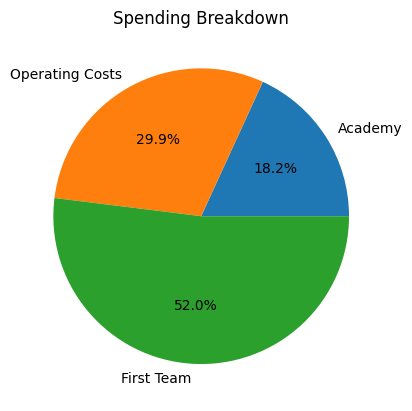

In [ ]:
# @title Spending Breakdown

import matplotlib.pyplot as plt

total_academy = data['Academy'].sum()
total_operating_costs = data['Operating Costs'].sum()
total_first_team = data['First Team'].sum()

sizes = [total_academy, total_operating_costs, total_first_team]
labels = ['Academy', 'Operating Costs', 'First Team']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Spending Breakdown')

## 2. Data Preprocessing

Justification for Training
Dataset Ratio

A common practice is to split the dataset into a 70:30 or 80:20 ratio, depending on the dataset size. Here, we will use an 80:20 ratio to ensure that the model has enough data to learn effectively while still being validated on a sufficiently large test set.

In [ ]:
# Extract the relevant features and target
X = data[['Academy']]  # Independent variable
y = data['Profit']     # Dependent variable

# Split the dataset into training and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for linear and polynomial regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Train Each Model

Simple Linear Regression

In [ ]:
# Train Simple Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)


LinearRegression()

Polynomial Regression

In [ ]:
# Train Polynomial Regression
poly_features = PolynomialFeatures(degree=3)  # Adjust the degree as necessary
X_poly_train = poly_features.fit_transform(X_train_scaled)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)


LinearRegression()

Decision Tree Regression

In [ ]:
# Train Decision Tree Regression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)  # No scaling needed for decision tree


DecisionTreeRegressor(random_state=42)

## 4. Predict Test Set Results for Each Model

In [ ]:
# Predicting results for Simple Linear Regression
y_pred_linear = linear_regressor.predict(X_test_scaled)

# Predicting results for Polynomial Regression
X_poly_test = poly_features.transform(X_test_scaled)
y_pred_poly = poly_regressor.predict(X_poly_test)

# Predicting results for Decision Tree Regression
y_pred_tree = tree_regressor.predict(X_test)


## 5. Visualize the Results

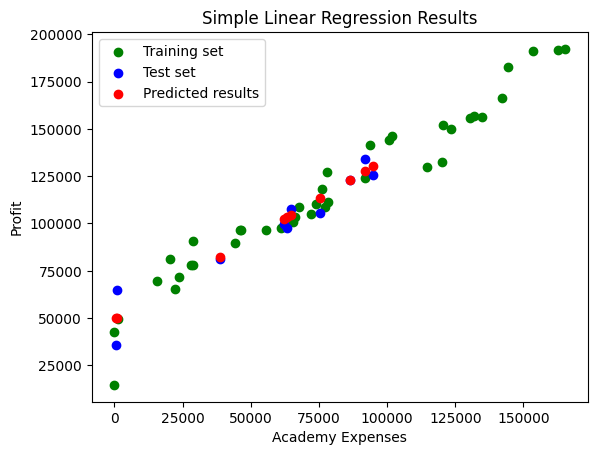

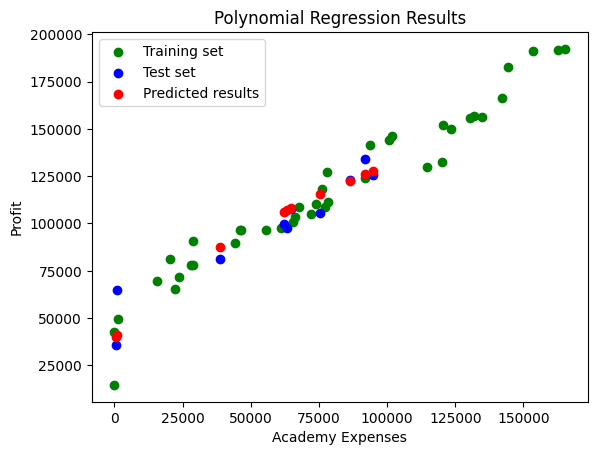

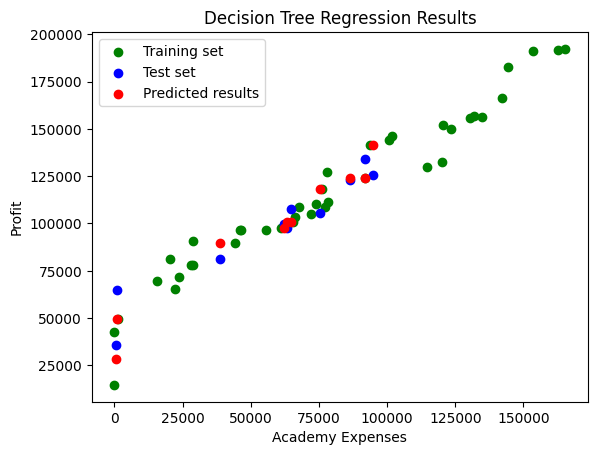

In [ ]:
# Function to visualize results
def plot_results(X_train, y_train, X_test, y_test, y_pred, model_name):
    plt.scatter(X_train, y_train, color='green', label='Training set')
    plt.scatter(X_test, y_test, color='blue', label='Test set')
    plt.scatter(X_test, y_pred, color='red', label='Predicted results')
    plt.title(f'{model_name} Results')
    plt.xlabel('Academy Expenses')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

# Plotting results for each model
plot_results(X_train, y_train, X_test, y_test, y_pred_linear, 'Simple Linear Regression')
plot_results(X_train, y_train, X_test, y_test, y_pred_poly, 'Polynomial Regression')
plot_results(X_train, y_train, X_test, y_test, y_pred_tree, 'Decision Tree Regression')


## 6. Evaluate the Performance of Each Model

In [ ]:
# Evaluate performance using R-squared coefficient
r2_linear = r2_score(y_test, y_pred_linear)
r2_poly = r2_score(y_test, y_pred_poly)
r2_tree = r2_score(y_test, y_pred_tree)

# Print R-squared values
print(f'R-squared for Simple Linear Regression: {r2_linear:.2f}')
print(f'R-squared for Polynomial Regression: {r2_poly:.2f}')
print(f'R-squared for Decision Tree Regression: {r2_tree:.2f}')


R-squared for Simple Linear Regression: 0.93
R-squared for Polynomial Regression: 0.88
R-squared for Decision Tree Regression: 0.88


## Model Performance Analysis

### Simple Linear Regression

R-squared: 0.93
Interpretation: This indicates that approximately 93% of the variance in profit can be explained by the linear relationship with academy expenses. This is a strong performance, suggesting that a linear model effectively captures the relationship.

### Polynomial Regression

R-squared: 0.88
Interpretation: While still high, this indicates that the polynomial regression model explains 88% of the variance in profit. Although this model can capture more complex relationships, it does not outperform the simple linear regression in this instance, which may suggest that the additional complexity of the polynomial terms is unnecessary.

### Decision Tree Regression

R-squared: 0.88
Interpretation: Similar to the polynomial regression, the decision tree model explains 88% of the variance. Decision trees can capture non-linear relationships and interactions between variables. However, their performance is comparable to the polynomial regression in this scenario.